In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

In [4]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [6]:
df.isna().sum()

ResponseId                                 0
Q120                                       0
MainBranch                                 0
Age                                        0
Employment                              1286
RemoteWork                             15374
CodingActivities                       15420
EdLevel                                 1211
LearnCode                               1521
LearnCodeOnline                        19100
LearnCodeCoursesCert                   52108
YearsCode                               1749
YearsCodePro                           23048
DevType                                12312
OrgSize                                24141
PurchaseInfluence                      24220
TechList                               28333
BuyNewTool                              6175
Country                                 1211
Currency                               23850
CompTotal                              40959
LanguageHaveWorkedWith                  2044
LanguageWa

In [7]:
null_percentage = df.isnull().mean(axis=1)
df.drop(df[null_percentage >= 0.7].index,inplace=True)

In [8]:
cols_to_drop = [
    'ResponseId', 'MainBranch', 'Q120',
    'TechList', 'BuyNewTool',
    'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm',
    'SOAI', 'AISelect', 'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 
    'AIToolCurrently Using', 'AIToolNot interested in Using', 'AINextVery different', 
    'AINextNeither different nor similar', 'AINextSomewhat similar', 'AINextVery similar', 
    'AINextSomewhat different', 'TBranch', 'ICorPM', 'Knowledge_1', 
    'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 
    'Knowledge_7', 'Knowledge_8',
    'TimeSearching', 'TimeAnswering', 'SurveyLength', 'SurveyEase',
    'Frequency_1', 'Frequency_2', 'Frequency_3', 
]
cols_to_keep = [
    'Age', 'Employment', 'RemoteWork',  'Currency', 'CompTotal',
    'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
    'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
    'OrgSize', 'PurchaseInfluence', 'Country',
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
    'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
    'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 
    'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
    'AIDevHaveWorkedWith', 'AIDevWantToWorkWith','ICorPM','WorkExp','ProfessionalTech', 'Industry',
    'ConvertedCompYearly'
]
df = df[cols_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87475 entries, 1 to 89183
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             87475 non-null  object 
 1   Employment                      87413 non-null  object 
 2   RemoteWork                      73723 non-null  object 
 3   Currency                        65258 non-null  object 
 4   CompTotal                       48218 non-null  float64
 5   CodingActivities                73682 non-null  object 
 6   EdLevel                         87475 non-null  object 
 7   LearnCode                       87226 non-null  object 
 8   LearnCodeOnline                 69888 non-null  object 
 9   LearnCodeCoursesCert            36994 non-null  object 
 10  YearsCode                       87037 non-null  object 
 11  YearsCodePro                    66093 non-null  object 
 12  DevType                         76775

In [9]:
def convert_years_code(value):
    if value == 'Less than 1 year':
        return 0.9
    elif value == 'More than 50 years':
        return 51
    else:
        try:
            return int(value)
        except ValueError:
            return None
c = ['YearsCode', 'YearsCodePro']

for i in c:
    df[i] = df[i].apply(convert_years_code)
    
  

[18.  27.  12.   6.  21.   4.   5.  20.  14.  10.  15.  11.   3.  24.
  8.  13.   0.9 16.  33.  22.  30.  32.   7.  35.  28.  40.  17.  29.
 19.  51.   9.  38.  26.  34.  25.   2.  45.  23.   nan 31.  43.   1.
 48.  41.  50.  39.  42.  37.  36.  44.  46.  49.  47. ]


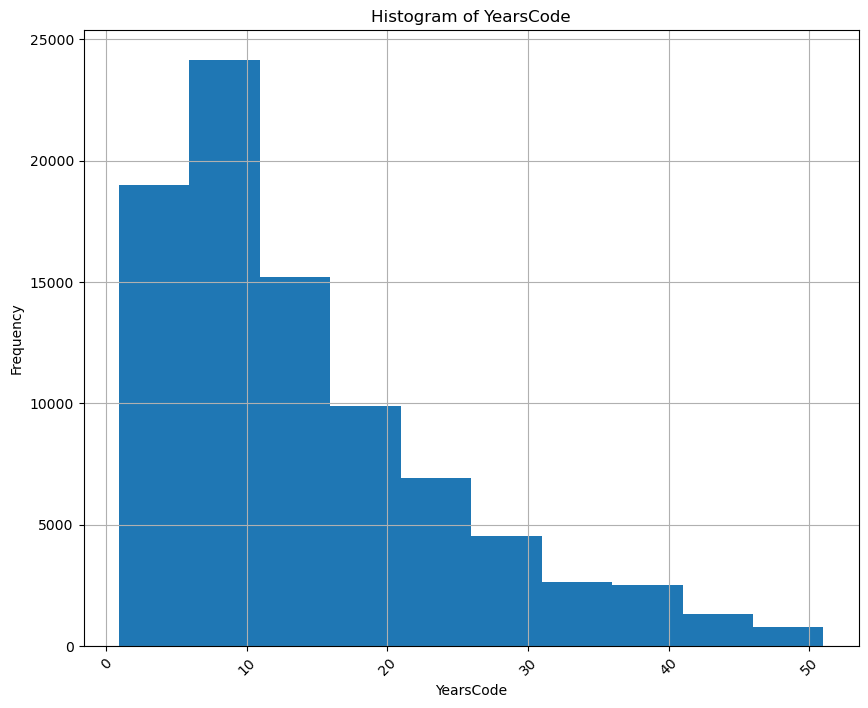

[ 9.  23.   7.   4.  21.   3.  15.   nan  0.9 10.   2.   6.  14.   5.
 19.  13.  16.  28.   1.  30.  11.   8.  25.  32.  24.  40.  17.  45.
 29.  12.  31.  20.  18.  50.  27.  43.  22.  26.  38.  33.  44.  35.
 34.  37.  42.  41.  51.  47.  36.  39.  48.  46.  49. ]


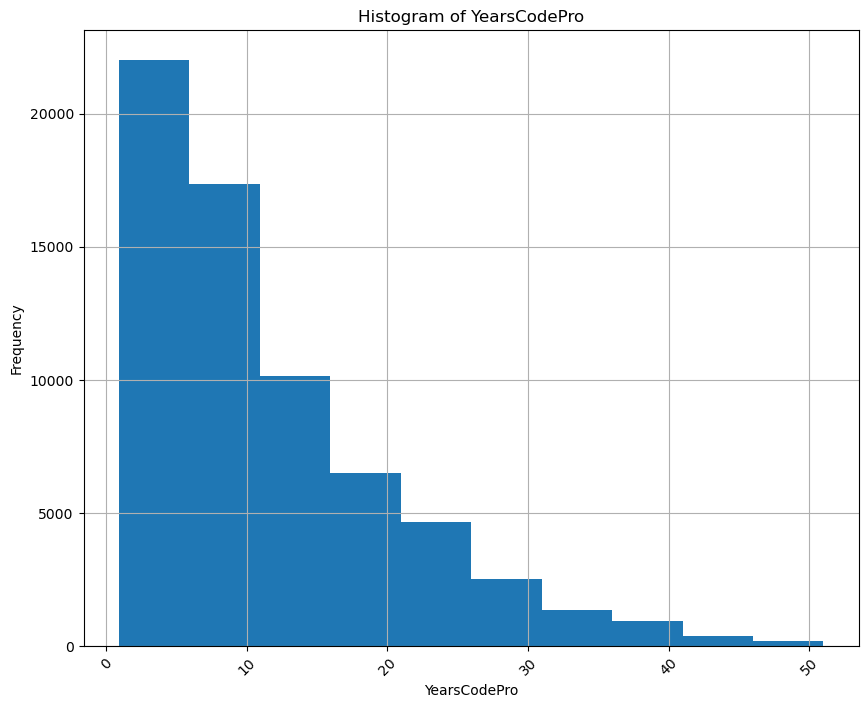

[10. 23.  7.  6. 22.  4.  5. nan  3.  9. 15. 14. 18. 13. 39.  2. 28. 12.
 17. 25. 11. 16. 30. 20. 24. 19.  1.  8. 26. 38. 27. 32. 21. 40.  0. 34.
 35. 29. 33. 37. 36. 31. 48. 45. 42. 43. 44. 50. 41. 46. 47. 49.]


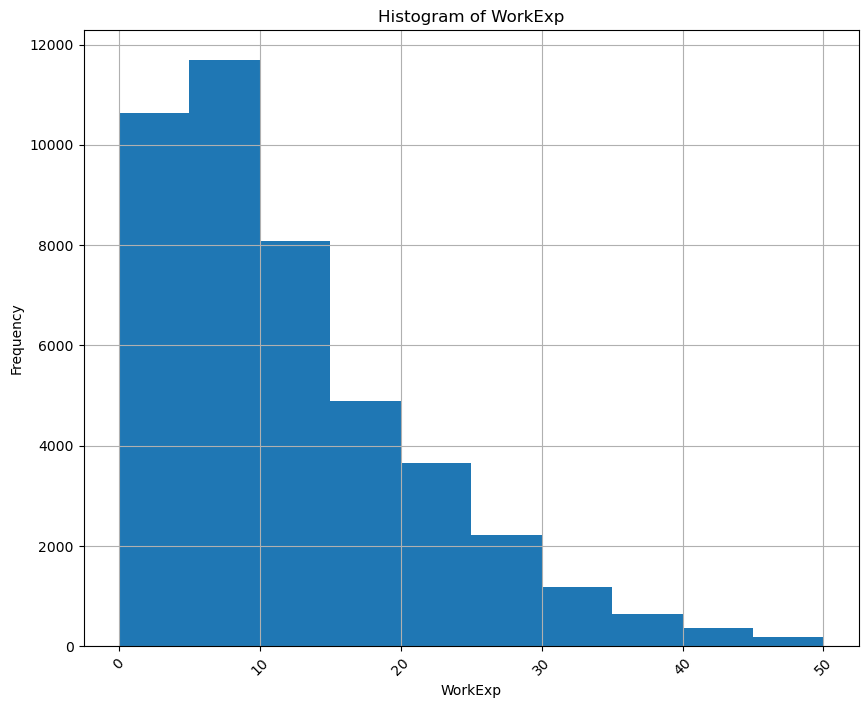

In [10]:
c =['YearsCode','YearsCodePro','WorkExp']

for i in c:
    print(df[i].unique())
    
    df[i].hist(bins=10, figsize=(10, 8))
    plt.title(f'Histogram of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
grouped_df = df.groupby(['Age',  'EdLevel']).agg({
    'YearsCode': 'median',       
    'YearsCodePro': 'median',    
    'WorkExp': 'median',         
}).reset_index()

grouped_df

,Age,EdLevel,YearsCode,YearsCodePro,WorkExp
0,18-24 years old,"Associate degree (A.A., A.S., etc.)",5.0,2.00,3.0
1,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,2.00,2.0
2,18-24 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7.0,2.00,2.0
3,18-24 years old,Primary/elementary school,5.0,3.00,3.0
4,18-24 years old,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6.0,2.00,2.0
5,18-24 years old,"Secondary school (e.g. American high school, G...",5.0,2.00,3.0
6,18-24 years old,Some college/university study without earning ...,5.0,2.00,2.0
7,18-24 years old,Something else,5.0,2.00,3.0
8,25-34 years old,"Associate degree (A.A., A.S., etc.)",10.0,6.00,8.0
9,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10.0,6.00,6.0


In [12]:
col =['YearsCode','YearsCodePro','WorkExp']
for i, row in df.iterrows():
    for c in col:
        if pd.isna(row[c]): 
            df.at[i, c] = grouped_df[(grouped_df['Age'] == row['Age']) & (grouped_df['EdLevel'] == row['EdLevel'])][c].values[0]


- Columns to Keep:

    - Demographic and Background Information: Age, EdLevel, Country
    - Employment and Job Characteristics: Employment, RemoteWork, YearsCode, YearsCodePro, DevType, OrgSize
    - Technical Skills and Tools: TechList, LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith
    - Compensation and Salary: ConvertedCompYearly (target variable)
    - Professional Experience: WorkExp, ProfessionalTech
    - Industry: Industry
- Columns to Drop:

    - Identifiers and Non-Informative Columns: ResponseId, Q120, MainBranch
    - Detailed Survey Responses: Columns that detail how often someone uses a tool or visits a website, such as SOVisitFreq, SOAccount, SOPartFreq, SOComm, SOAI, etc., may not directly correlate with salary.
    - AI and Tool Sentiment and Usage: Columns like AISelect, AISent, AIAcc, AIBen, and various AI*WantToWorkWith and AI*NotInterested columns may not directly affect salary.
    - Survey Feedback and Meta Information: Columns like SurveyLength and SurveyEase are related to the survey itself rather than the respondent's characteristics that influence salary.

In [14]:
df['DevType'].unique()

array(['Senior Executive (C-Suite, VP, etc.)', 'Developer, back-end',
       'Developer, front-end', 'Developer, full-stack',
       'System administrator',
       'Developer, desktop or enterprise applications',
       'Developer, QA or test', 'Designer',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional', 'Educator',
       'Research & Development role', nan, 'Other (please specify):',
       'Developer, mobile', 'Database administrator',
       'Developer, embedded applications or devices', 'Student',
       'Engineer, data', 'Hardware Engineer', 'Product manager',
       'Academic researcher', 'Developer, game or graphics',
       'Cloud infrastructure engineer', 'Engineering manager',
       'Developer Experience', 'Project manager', 'DevOps specialist',
       'Engineer, site reliability', 'Blockchain', 'Developer Advocate',
       'Scientist', 'Marketing or sales professional'], dtype=object)

In [15]:
# Filter the DataFrame where DevType is NaN
filtered_df = df[df['DevType'].isna()]

# Get the unique values of Employment in the filtered DataFrame
unique_employment_values = filtered_df['Employment'].unique()

# Display the unique employment values
print(unique_employment_values)

['Student, full-time' 'I prefer not to say' 'Retired'
 'Independent contractor, freelancer, or self-employed'
 'Student, full-time;Student, part-time'
 'Not employed, and not looking for work' 'Student, part-time'
 'Student, full-time;Not employed, and not looking for work'
 'Not employed, but looking for work' nan 'Employed, full-time'
 'Student, part-time;Not employed, and not looking for work'
 'Not employed, but looking for work;Student, full-time'
 'Retired;Not employed, and not looking for work' 'Employed, part-time'
 'Not employed, but looking for work;Student, part-time'
 'Student, full-time;Employed, part-time'
 'Independent contractor, freelancer, or self-employed;Student, full-time'
 'Employed, full-time;Independent contractor, freelancer, or self-employed'
 'Not employed, but looking for work;Not employed, and not looking for work'
 'Independent contractor, freelancer, or self-employed;Employed, part-time'
 'Student, full-time;Retired' 'Employed, part-time;Student, part-tim

In [16]:
def fill_devtype(row):
    if pd.isna(row['DevType']):
        employment_status = row['Employment']
        
        # Check if employment_status is NaN
        if pd.isna(employment_status):
            return 'Not specified'
        
        # Fill DevType based on Employment status
        if 'Student' in employment_status:
            return 'Student'
        elif 'Retired' in employment_status:
            return 'Retired'
        elif 'Not employed' in employment_status:
            return 'Not employed'
        elif 'Independent contractor' in employment_status:
            return 'Independent contractor, freelancer, or self-employed'
        else:
            return 'Other'
    else:
        return row['DevType']

# Apply the function to fill NaN values in DevType
df['DevType'] = df.apply(fill_devtype, axis=1)


In [17]:
# Filter the DataFrame where Employment is 'Student'
student_df = df[df['Employment'].str.contains('Student', na=False)]

# Get unique values for OrgSize and PurchaseInfluence for students
unique_orgsize_student = student_df['OrgSize'].unique()
unique_purchaseinfluence_student = student_df['PurchaseInfluence'].unique()

# Display the unique values
print("Unique OrgSize values for students:", unique_orgsize_student)
print("Unique PurchaseInfluence values for students:", unique_purchaseinfluence_student)

Unique OrgSize values for students: [nan]
Unique PurchaseInfluence values for students: [nan]


In [18]:
# Fill missing values for OrgSize and PurchaseInfluence for students with 'Not Applicable'
df.loc[df['Employment'].str.contains('Student', na=False), ['OrgSize', 'PurchaseInfluence']] = df.loc[
    df['Employment'].str.contains('Student', na=False), ['OrgSize', 'PurchaseInfluence']
].fillna('Not Applicable')


In [19]:
# List of columns to fill NaN values
columns_to_fill = [
    'RemoteWork', 'CodingActivities', 
    'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert','OrgSize', 'PurchaseInfluence',
    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use',
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'ICorPM',
    'ProfessionalTech', 'Industry' 

]

# Fill NaN values with 'Not specified' for the selected columns
df[columns_to_fill] = df[columns_to_fill].fillna('Not specified')

In [21]:
currency_to_usd = {
    'USD': 1,
    'PHP': 0.018,  # Philippine peso
    'GBP': 1.25,   # Pound sterling
    'EUR': 1.09,   # Euro
    'AUD': 0.66,   # Australian dollar
    'SEK': 0.095,  # Swedish krona
    'AMD': 0.0026, # Armenian dram
    'ZAR': 0.054,  # South African rand
    'BRL': 0.20,   # Brazilian real
    'BDT': 0.0092, # Bangladeshi taka
    'CAD': 0.74,   # Canadian dollar
    'CHF': 1.12,   # Swiss franc
    'LKR': 0.0031, # Sri Lankan rupee
    'INR': 0.012,  # Indian rupee
    'IRR': 0.000024, # Iranian rial
    'PLN': 0.25,   # Polish zloty
    'RUB': 0.011,  # Russian ruble
    'TRY': 0.034,  # Turkish lira
    'DKK': 0.15,   # Danish krone
    'ILS': 0.27,   # Israeli new shekel
    'HUF': 0.0029, # Hungarian forint
    'SGD': 0.74,   # Singapore dollar
    'AED': 0.27,   # United Arab Emirates dirham
    'NOK': 0.095,  # Norwegian krone
    # Add more currencies as needed
}

In [22]:
# Function to extract currency code from the string
def extract_currency_code(currency_string):
    if pd.isna(currency_string):
        return 'USD'  # Default to USD if missing
    return currency_string.split('\t')[0]

# Apply the function to create a new column with just the currency code
df['Currency'] = df['Currency'].apply(extract_currency_code)
df['Currency']

1        USD
2        USD
3        USD
4        PHP
5        GBP
        ... 
89179    BRL
89180    USD
89181    USD
89182    USD
89183    IRR
Name: Currency, Length: 87475, dtype: object

In [23]:
# Function to calculate ConvertedCompYearly in USD
def convert_to_usd(row):
    currency = row['Currency']
    if currency in currency_to_usd:
        return row['CompTotal'] * currency_to_usd[currency]
    else:
        return row['CompTotal']  # Default to CompTotal if currency is not found

# Apply the conversion function
df.loc[(df['ConvertedCompYearly'].isna()) & (df['CompTotal'].notna()), 'ConvertedCompYearly'] = df.apply(convert_to_usd, axis=1)
df

,Age,Employment,RemoteWork,Currency,CompTotal,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,USD,2.850000e+05,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,United States of America,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,People manager,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",USD,2.500000e+05,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,Not specified,27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",I have some influence,United States of America,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,Not specified,Not specified,Amazon Web Services (AWS);Google Cloud;OpenSta...,Not specified,Not specified,Not specified,Not specified,Not specified,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,Not specified,Not specified,Not specified,Not specified,Individual contributor,23.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",USD,1.560000e+05,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,Not specified,12.0,7.0,"Developer, front-end",100 to 499 employees,I have some influence,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Not specified,Not specified,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Di

In [24]:
df.drop(columns=['CompTotal','Currency'],axis=1,inplace=True)

In [25]:
df = df.dropna(subset=['Employment','YearsCodePro','WorkExp'])
df.isna().sum()

Age                                   0
Employment                            0
RemoteWork                            0
CodingActivities                      0
EdLevel                               0
LearnCode                             0
LearnCodeOnline                       0
LearnCodeCoursesCert                  0
YearsCode                             0
YearsCodePro                          0
DevType                               0
OrgSize                               0
PurchaseInfluence                     0
Country                               0
LanguageHaveWorkedWith                0
LanguageWantToWorkWith                0
DatabaseHaveWorkedWith                0
DatabaseWantToWorkWith                0
PlatformHaveWorkedWith                0
PlatformWantToWorkWith                0
WebframeHaveWorkedWith                0
WebframeWantToWorkWith                0
MiscTechHaveWorkedWith                0
MiscTechWantToWorkWith                0
ToolsTechHaveWorkedWith               0


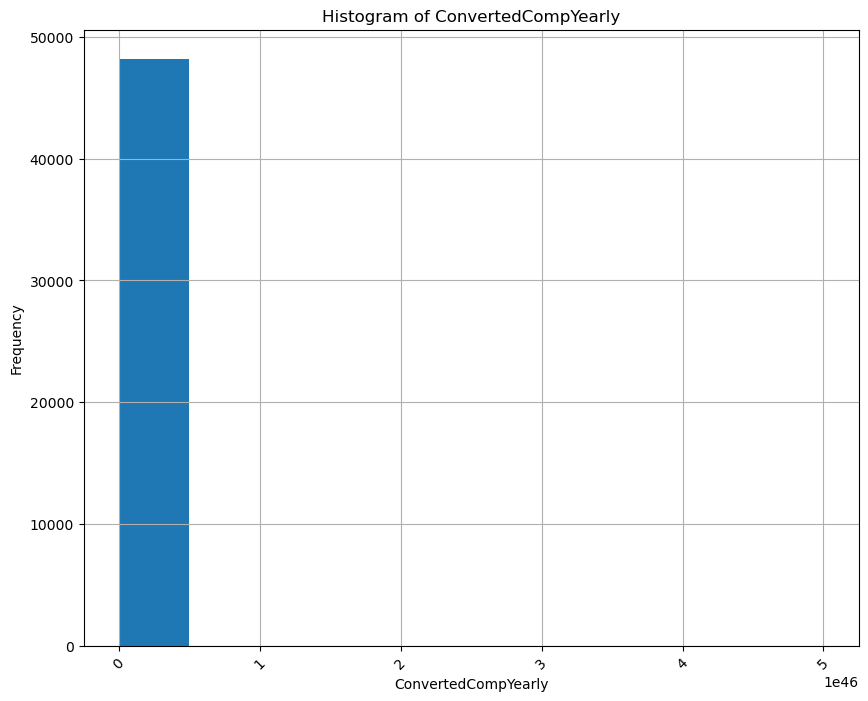

In [26]:
df['ConvertedCompYearly'].hist(bins=10, figsize=(10, 8))
plt.title(f'Histogram of ConvertedCompYearly')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [27]:
grouped_medians = df.groupby(['DevType', 'WorkExp'])['ConvertedCompYearly'].median()
grouped_medians

DevType               WorkExp
Academic researcher   0.0        3.819700e+04
                      1.0        3.855200e+04
                      2.0        4.283600e+04
                      3.0        4.530600e+04
                      4.0        4.275200e+04
                                     ...     
System administrator  40.0       5.064300e+04
                      43.0       5.017900e+04
                      44.0       7.000000e+04
                      45.0       7.932500e+04
                      50.0       9.249014e+07
Name: ConvertedCompYearly, Length: 1498, dtype: float64

In [28]:
def fill_missing(row):
    if pd.isna(row['ConvertedCompYearly']):
        # Return the median based on the group (DevType and WorkExp)
        return grouped_medians.get((row['DevType'], row['WorkExp']), row['ConvertedCompYearly'])
    return row['ConvertedCompYearly']

df.loc[:, 'ConvertedCompYearly']  = df.apply(fill_missing, axis=1)

df.dropna()

,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,ICorPM,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
1,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18.0,9.0,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,United States of America,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,People manager,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,Not specified,27.0,23.0,"Developer, back-end","5,000 to 9,999 employees",I have some influence,United States of America,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,Not specified,Not specified,Amazon Web Services (AWS);Google Cloud;OpenSta...,Not specified,Not specified,Not specified,Not specified,Not specified,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,Not specified,Not specified,Not specified,Not specified,Individual contributor,23.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,Not specified,12.0,7.0,"Developer, front-end",100 to 499 employees,I have some influence,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Not specified,Not specified,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Slack;Zoom,Not specified,Not specified,Not specified

In [57]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

# Verify if it has been saved properly
print("Data saved to 'cleaned_data.csv'")

Data saved to 'cleaned_data.csv'


为了帮助你确定哪些列可能会影响 `ConvertedCompYearly`（年薪），哪些列不会，我参考了PDF文件内容以及调查的上下文，以下是我的分析：

### 影响薪资的重要列 (`ConvertedCompYearly`)
1. **人口统计信息**：
   - `Age`（年龄）：薪资通常与年龄相关，因为年龄往往与工作经验挂钩。
   - `Country`（国家）：不同国家的薪资差异显著。
   - `Currency`（货币）：了解`ConvertedCompYearly`的背景货币很重要，但你可能需要将薪资标准化为一种货币。
   - `Gender`（性别）、`Ethnicity`（种族）：这些因素可能会影响薪资，但这类数据通常较为敏感。

2. **工作与职业**：
   - `MainBranch`（主要职业）：如果他们是专业开发者，这与薪资直接相关。
   - `Employment`（就业状况）：就业状态会影响薪资。
   - `RemoteWork`（远程工作）：远程职位的薪资范围可能不同。
   - `YearsCode`（编程年限）、`YearsCodePro`（专业编程年限）：经验直接影响薪资。
   - `DevType`（开发类型）：开发者的角色类型（如前端、后端）往往决定薪资水平。
   - `OrgSize`（公司规模）：公司的规模会影响薪资；大型公司可能提供更高的薪资。
   - `WorkExp`（工作经验）：整体工作经验影响薪资。

3. **教育**：
   - `EdLevel`（教育水平）：教育水平是薪资的关键预测因素。
   - `LearnCode`（学习编码方式）、`LearnCodeOnline`（在线学习编码）、`LearnCodeCoursesCert`（编码课程认证）：学习方法可能有一些影响，尤其是某些认证在行业中很有价值。

4. **技术和工具**：
   - `LanguageHaveWorkedWith`（使用过的编程语言）、`LanguageWantToWorkWith`（想要使用的编程语言）：某些编程语言更为高薪。
   - `DatabaseHaveWorkedWith`（使用过的数据库）、`DatabaseWantToWorkWith`（想要使用的数据库）：数据库专业知识在某些角色中很有价值。
   - `PlatformHaveWorkedWith`（使用过的平台）、`PlatformWantToWorkWith`（想要使用的平台）：对特定平台的经验会影响薪资。
   - `WebframeHaveWorkedWith`（使用过的网页框架）、`WebframeWantToWorkWith`（想要使用的网页框架）等：框架和技术专长也起到作用。

5. **公司影响力**：
   - `PurchaseInfluence`（购买影响力）：如果某人在技术购买上有影响力，可能意味着他们的职位较高，薪资也较高。
   - `BuyNewTool`（购买新工具）：与购买影响力类似，这可能表明其职位较高。

6. **专业因素**：
   - `TechList`（技术列表）：列出受访者使用过的技术，反映他们的知识广度。
   - `ProfessionalTech`（专业技术）：在专业环境中使用的技术通常与更高的薪资相关。
   - `Industry`（行业）：不同行业的薪资差异显著。

### 对薪资预测影响较小的列：
1. **调查互动**：
   - `SurveyLength`（调查时长）、`SurveyEase`（调查难易度）：这些列与调查体验相关，与薪资无直接关系。
   
2. **Stack Overflow 使用情况**：
   - `SOVisitFreq`（访问频率）、`SOAccount`（账户）、`SOPartFreq`（参与频率）、`SOComm`（社区）：虽然这些信息有助于分析社区参与度，但与薪资预测关系不大。
   
3. **AI 和工具偏好**：
   - `AISearchHaveWorkedWith`（使用过的AI搜索工具）、`AISearchWantToWorkWith`（想要使用的AI搜索工具）、`AIDevHaveWorkedWith`（使用过的AI开发工具）等：虽然新兴技术重要，但当前使用的AI工具对薪资的直接影响可能不如传统编程语言和平台。
   
4. **工作流和知识共享**：
   - `Knowledge_1`到`Knowledge_8`：这些列主要涉及公司内部工作流和协作，对薪资的直接影响较小。

### 下一步建议
1. **专注于关键列**：在你的EDA和预测模型中，优先考虑与人口统计、工作经验、教育和技术使用相关的列。
2. **考虑交互效应**：一些列之间可能存在交互（例如，`YearsCode`与`EdLevel`），这些交互效应在建模时应考虑在内。
3. **删除相关性较低的列**：虽然它们可能提供有趣的见解，但与调查体验或社区参与度相关的列可以优先考虑剔除。

如果你同意这些建议，我们可以继续进行分析，或者你可以告诉我你是否希望进一步探讨某些特定的列。